# Deep Learning for Geo/Environmental sciences

<center><img src="../logo_2.png" alt="logo" width="600"/></center>

<em>*Created with ChapGPT</em>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Lecture 4: (Artificial) Neural Networks

 - [Introduction](#Introduction)
 - [Perceptron](#Perceptron)
 - [Optimization](#Optimization)
 - [Convolutional Neural Networks](#Convolutional-Neural-Networks)

In this lesson, we introduce artificial neural network. By the
end of the lesson, we will be able to:

- Understand the multilayer perceptron as an artificial neural network.
- Understand the optimization of neural networks.
- Understand the basics of convolutional neural networks.


This tutorial is modified from
- Scikit-learn documentation on Linear Regression, Multilayer Perceptrons at [Scikit-Learn user guide](https://scikit-learn.org/stable/user_guide.html).
- Zhang *et al.*'s tutorial on Linear Neural Networks and Multilayer Perceptrons at [Dive into Deep Learning](https://d2l.ai/index.html)
- Saha's tutorial on convolutional neural network at [Towards Data Science
](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)


## Introduction

### Biology Background of Artificial Neurons

Because linear regression predates computational neuroscience,
it might seem anachronistic to describe
linear regression in terms of neural networks.
Nonetheless, they were a natural place to start
when the cyberneticists and neurophysiologists
Warren McCulloch and Walter Pitts began to develop
models of artificial neurons.
Consider the cartoonish picture
of a biological neuron,
consisting of 
- *dendrites* (input terminals),
- the *nucleus* (CPU),
- the *axon* (output wire),
- the *axon terminals* (output terminals),
- and the connections to other neurons via *synapses*.

![The real neuron (source: "Anatomy and Physiology" by the US National Cancer Institute's Surveillance, Epidemiology and End Results (SEER) Program).](https://d2l.ai/_images/neuron.svg)


The biological process of information transmission among neurons can be briefly summarized as below:
1. Information $x_i$ arriving from other neurons
(or environmental sensors) is received in the dendrites.
2. The information is weighted by *synaptic weights* $w_i$,
determining the effect of the inputs,
e.g., activation or inhibition via the product $x_i w_i$.
3. The weighted inputs arriving from multiple sources
are aggregated in the nucleus
as a weighted sum $y = \sum_i x_i w_i + b$.
4. The weighted sum goes through some nonlinear postprocessing via a function $\sigma(y)$.
5. This information is then sent via the axon to the axon terminals,
where it reaches its destination
(e.g., an actuator such as a muscle)
or it is fed into another neuron via its dendrites.

Our brain is composed of billions of neurons, i.e. neuron networks.

### Linear Regression as a Neural network

Recall the linear model 

$\hat{y} = w_1  x_1 + \cdots + w_d  x_d + b.$ with the weighting coefficients $w_1, ..., w_d$, the bias $b$, and the inputs $x_1, ..., x_p$. We will also call $X$ the features.

We can also write this in vector form by defining the weighting vector $\mathbf{w} = (w_1, ..., w_d)^\top$, and the input vector $\mathbf{x} = (x_1, ..., x_p)^\top$.

$$\hat{y} = \mathbf{w}^\top \mathbf{x} + b.$$

<!-- Here the vector $\mathbf{x}$
corresponds to the features of a single example.
We will often find it convenient
to refer to features of our entire dataset of $n$ examples
via the *design matrix* $\mathbf{X}$.
Here, $\mathbf{X}$ contains one row for every example
and one column for every feature.
For a collection of features $\mathbf{X}$,
the predictions $\hat{\mathbf{y}} \in \mathbb{R}^n$
can be expressed via the matrix--vector product:

$${\hat{\mathbf{y}}} = \mathbf{X} \mathbf{w} + b,$$ -->

Now we can depict
linear regression as a neural network using the diagram below, which highlights how each input is connected to the output,
but not the specific values taken by the weights or biases.

![Linear regression is a single-layer neural network.](https://d2l.ai/_images/singleneuron.svg)


We can generalize the linear model by considering multiple outputs and adding one layer, i.e. the _hidden layer_. For example, a multi-layer linear neural network may look like:

![a](https://d2l.ai/_images/mlp.svg)


Mathematically, this can be written as:

$$
\begin{aligned}
    \mathbf{H} & = \mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}, \\
    \mathbf{O} & = \mathbf{H}\mathbf{W}^{(2)} + \mathbf{b}^{(2)}.
\end{aligned}
$$
Where $\mathbf{W}^{(i)}$ and $\mathbf{b}^{(i)}$ $i=1, 2$ are the weighting coefficients and bias vectors corresponding to the *i*th connections, respectively.



Note that the matrix/vector form here is a compact way to avoid the tedious scalar form of the model:
$$
\begin{aligned}    
    h_1 & = w_11^{(1)}x_1 + \cdots + w_14^{(1)}x_4 + b_1^{(1)}, \\
    h_2 & = w_21^{(1)}x_1 + \cdots + w_24^{(1)}x_4 + b_2^{(1)}, \\
    \cdots\\
    h_5 & = w_51^{(1)}x_1 + \cdots + w_54^{(1)}x_4 + b_5^{(1)}, \\
    o_1 & = w_11^{(2)}h_1 + \cdots + w_15^{(1)}h_5 + b_1^{(1)}, \\
    \cdots\\
    o_3 & = w_31^{(2)}h_1 + \cdots + w_35^{(1)}h_5 + b_3^{(1)}, \\    
\end{aligned}
$$

No matter how many hidden layers we add, the linear network will remain linear! In other words, $\mathbf{O}$ will always be a linear function of $\mathbf{X}$.


To prove this, we can combine the above equations to obtain:

$$
\mathbf{O} = (\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)})\mathbf{W}^{(2)} + \mathbf{b}^{(2)} = \mathbf{X} \mathbf{W}^{(1)}\mathbf{W}^{(2)} + \mathbf{b}^{(1)} \mathbf{W}^{(2)} + \mathbf{b}^{(2)} = \mathbf{X} \mathbf{W} + \mathbf{b}.
$$

where $\mathbf{W} = \mathbf{W}^{(1)}\mathbf{W}^{(2)}$ and $\mathbf{b} = \mathbf{b}^{(1)} \mathbf{W}^{(2)} + \mathbf{b}^{(2)}$.

## Nonlinearity and activation function
In order to approximate more,
we need one more key ingredient: a
nonlinear *activation function* $\sigma$
to be applied to each hidden unit. 

For instance, a popular
choice is the ReLU (rectified linear unit) activation function $\sigma(x) = \mathrm{max}(0, x)$ operating on its arguments elementwise.
The outputs of activation functions $\sigma(\cdot)$
are called *activations*.

## Nonlinearity and activation function

Let's see some examples

<Axes: >

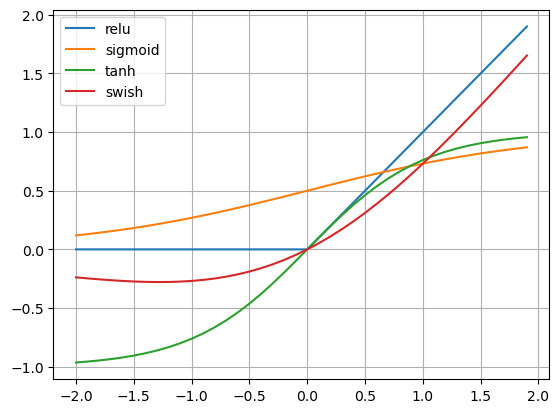

In [3]:
from keras.activations import relu, sigmoid, tanh, swish
x = np.arange(-2.0, 2.0, 0.1)
pd.DataFrame(index=x, data={'relu': relu(x),
                            'sigmoid': sigmoid(x), 'tanh': tanh(x), 
                            'swish': swish(x)}).plot(grid=True)

In general, with the **nonlinear** activation functions in place,
it is no longer possible to collapse our MLP into a linear model:

$$
\begin{aligned}
    \mathbf{H} & = \sigma(\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}), \\
    \mathbf{O} & = \mathbf{H}\mathbf{W}^{(2)} + \mathbf{b}^{(2)}.\\
\end{aligned}
$$

To build more general MLPs, we can continue stacking
such hidden layers,
e.g., $\mathbf{H}^{(1)} = \sigma_1(\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)})$
and $\mathbf{H}^{(2)} = \sigma_2(\mathbf{H}^{(1)} \mathbf{W}^{(2)} + \mathbf{b}^{(2)})$,
one atop another, yielding ever more expressive models.


## A regression example using MLP

Now let's look at an example. For fairness we will repeat the Gaussian process regression example from the previous lesson, but this time using a neural network.

Recall, the data is generated from the function $y = sin(x)$, where the training data is randomly sampled from a smaller portion of the domain than the test data.

In [10]:
n1 = 80  # Number of points to condition on (training points)
n2 = 75  # Number of points in posterior (test points)
ny = 5  # Number of functions that will be sampled from the posterior
domain = (-6, 6)

# Sample observations (X1, y1) on the function
X_train = np.random.uniform(domain[0]+2, domain[1]-2, size=(n1, 1))
y_train = np.sin(X_train)
# Predict points at uniform spacing to capture function
X_test = np.linspace(domain[0], domain[1], n2).reshape(-1, 1)
y_test = np.sin(X_test)

We will use the `MLPRegressor` class from the `sklearn.neural_network` module to train a neural network on the training data. We will use the ReLU activation function.

We define an MLPRegressor model with two hidden layers, specified by the `hidden_layer_sizes` parameter. We use the ReLU activation function and the stochastic gradient descent optimizer. We then train the model on the standardized training data.

In [13]:
from sklearn.neural_network import MLPRegressor

mlp_regressor = MLPRegressor(hidden_layer_sizes=(50, 50), activation='relu', random_state=42, solver='sgd')  
mlp_regressor.fit(X_train, y_train)

/Users/watson-parris/miniconda3/envs/sio209_dev/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/watson-parris/miniconda3/envs/sio209_dev/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(50, 50), random_state=42, solver='sgd')

Let's plot the actual and predicted values for the test data, as well as the training points.

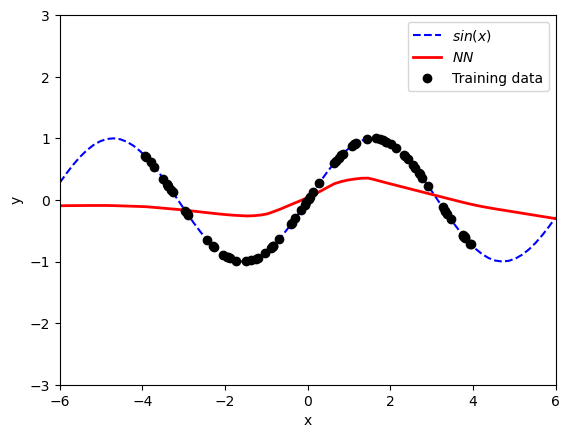

In [14]:
y_pred = mlp_regressor.predict(X_test)

plt.plot(X_test, y_test, 'b--', label='$sin(x)$')
plt.plot(X_test, y_pred, 'r-', lw=2, label='$NN$')
plt.plot(X_train, y_train, 'ko', linewidth=2, label='Training data')
plt.setp(plt.gca(), xlabel='x', ylabel='y', xlim=[domain[0], domain[1]], ylim=[-3, 3])
plt.legend()

We calculate the mean squared error (MSE) between the actual and predicted output features. Lower MSE indicates better performance.


In [7]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.7622038443501524


Note, that if we specify `early_stopping=True`, the model will stop training when the validation score stops improving.

/Users/watson-parris/miniconda3/envs/sio209_dev/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/watson-parris/miniconda3/envs/sio209_dev/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


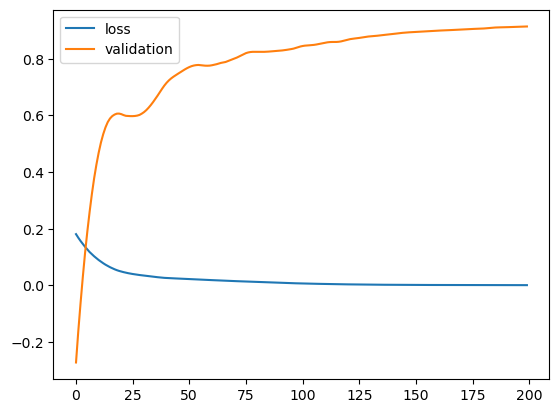

In [8]:
# Rerun the MLPRegressor with early stopping to output the validation (R2) scores
mlp_regressor = MLPRegressor(hidden_layer_sizes=(50, 50), activation='relu', random_state=42, validation_fraction=0.2, early_stopping=True)
mlp_regressor.fit(X_train, y_train)

plt.plot(mlp_regressor.loss_curve_, label='loss')
plt.plot(mlp_regressor.validation_scores_, label='validation')
plt.legend()

Overfitting is pernicious in neural networks, and especially in deep networks, which are particularly prone to overfitting. Recall that the number of parameters in a neural network is the sum of the parameters in each layer. A network with too many parameters is likely to overfit. 

In [9]:
print(mlp_regressor.coefs_[0].shape)
print(mlp_regressor.coefs_[1].shape)
print(mlp_regressor.coefs_[2].shape)
print(sum([np.prod(coef.shape) for coef in mlp_regressor.coefs_]))

(1, 50)
(50, 50)
(50, 1)
2600


Early stopping is a simple and commonly used technique to prevent overfitting. It works by monitoring the validation error during training and stopping the training process when the validation error stops improving.

You can detect overfitting by comparing the training and validation errors. If the training error decreases while the validation error increases, the model is likely overfitting which is why it can be useful to plot both errors during training.

**Summary of neural network**
- Activation function (nonlinearity) matters.
- Theoretically, a single-hidden-layer nonlinear network can learn any function, i.e., they are _universal approximators_.
- In reality, we need to choose many more hidden-layers (depending on the data and problem).



## Optimization 

We have glossed over one key aspect of neural networks: optimization. Optimization is the process of finding the best set of parameters for a model. In the context of neural networks, optimization is the process of finding the best set of weights and biases for the model.


Optimization is the process when the machine _learns_ from the data, and it is the most important part of the machine learning process. Advances in optimization algorithms have been the key to the success of deep learning in recent years.

There are a number of key challenges in optimization for neural networks we will briefly summarize here.

**Challenge 1: Local minima**

Local minima refer to parts of the solution space that are not the global minimum. The optimization algorithm may get stuck in these local minima and fail to find the global minimum.

<img src="_images/local_minima.png">

**Challenge 2: Saddle point**

A *saddle point* is any location where all gradients of a function vanish but which is neither a global nor a local minimum. In high-dimensional spaces, saddle points are more common than local minima.

<img src="_images/saddle_points.png">

**Challenge 3: Vanishing gradient**

The *vanishing gradient* problem occurs when the gradients of the loss function become very small as they are back-propagated through the network. This can cause the weights to stop updating, preventing the network from learning.

Reparameterization, batch normalization, and skip connections are some of the techniques used to mitigate the vanishing gradient problem.

<img src="_images/vanisihing_gradients.png">

## An example optimization algorithm: Gradient Descent

Before discussing ways we can avoid and mitigate these, let's look at some specific (simple) optimization algorithms.


Gradient descent is an optimization algorithm that may reduce the value of the objective function. Consider some continuously differentiable 1D real-valued function $f(x)$. Using a Taylor expansion we obtain
$$f(x + \epsilon) = f(x) + \epsilon f'(x).$$


In first-order approximation, $f(x+\epsilon)$ is given by the function value $f(x)$ and the first derivative $f'(x)$ at $x$. 


We find that $f(x+\epsilon)<f(x)$ if $\epsilon$ and $f'(x)$ have opposite signs. To keep things simple we pick a fixed step size $\eta > 0$ and choose $\epsilon = -\eta f'(x)$. Plugging this into the Taylor expansion above we get

$$f(x - \eta f'(x)) = f(x) - \eta f'^2(x).$$


If the derivative $f'(x) \neq 0$ does not vanish we make progress since $\eta f'^2(x)>0$. Moreover, we can always choose $\eta$ small enough for the higher-order terms to become irrelevant. 



This means that, if we use

$$x \leftarrow x - \eta f'(x)$$

to iterate $x$, the value of function $f(x)$ might decline. 



Therefore, in gradient descent we first choose an initial value $x$ and a constant $\eta > 0$ and then use them to continuously iterate $x$ until the stop condition is reached, for example, when the magnitude of the gradient $|f'(x)|$ is small enough or the number of iterations has reached a certain value.



For simplicity we choose the objective function $f(x)=x^2$ to illustrate how to implement gradient descent. Although we know that $x=0$ is the solution to minimize $f(x)$, we still use this simple function to observe how $x$ changes.

In [15]:
def f(x):
    if isinstance(x, list):
        return [xi**2 for xi in x]  # Apply the operation element-wise if x is a list
    else:
        return x**2  # Otherwise, if x is a single value, perform the operation directly


def f_grad(x):  # Gradient (derivative) of the objective function
    return 2 * x

Next, we use $x=10$ as the initial value and assume $\eta=0.2$. Using gradient descent to iterate $x$ for 10 times we can see that, eventually, the value of $x$ approaches the optimal solution.

In [16]:
def gd(eta, f_grad):
    x = 10.0
    results = [x]
    for i in range(10):
        x -= eta * f_grad(x)
        results.append(float(x))
    print(f'epoch 10, x: {x:f}')
    return results

results = gd(0.2, f_grad)

epoch 10, x: 0.060466


The progress of optimizing over x can be plotted as follows.

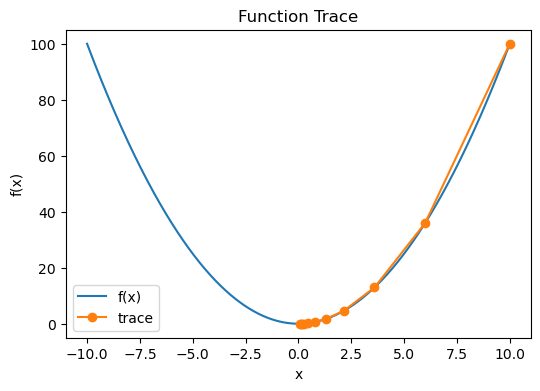

In [17]:
def show_trace(results, f):
    n = max(abs(np.min(results)), abs(np.max(results)))
    f_line = np.arange(-n, n, 0.01)
    plt.figure(figsize=(6, 4))
    plt.plot(f_line, f(f_line), '-', label='f(x)')
    plt.plot(results, f(results), '-o', label='trace')
    plt.setp(plt.gca(), xlabel='x', ylabel='f(x)', title='Function Trace')
    plt.legend()
    plt.show()

show_trace(results, f)

### Learning Rate $\eta$
The step size $\eta$ is also called the *learning rate*. If we use a learning rate that is too small, it will cause $x$ to update very slowly, requiring more iterations to get a better solution. To show what happens in such a case, consider the progress in the same optimization problem for $\eta = 0.05$. As we can see, even after 10 steps we are still very far from the optimal solution.


epoch 10, x: 3.486784


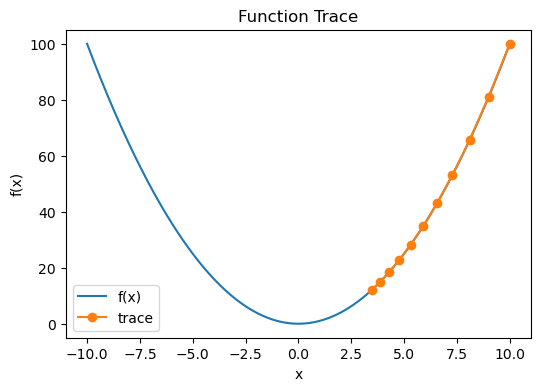

In [18]:
show_trace(gd(0.05, f_grad), f)

## Multivariate Gradient Descent

We now generalize the algorithm and consider a multivariate case where $\mathbf{x} = [x_1, x_2, \ldots, x_d]^\top$. That is, the objective function $f(\mathbf{x})$ maps vectors into scalars. Correspondingly its gradient is multivariate, too. It is a vector consisting of $d$ partial derivatives:

$$\nabla f(\mathbf{x}) = \bigg[\frac{\partial f(\mathbf{x})}{\partial x_1}, \frac{\partial f(\mathbf{x})}{\partial x_2}, \ldots, \frac{\partial f(\mathbf{x})}{\partial x_d}\bigg]^\top.$$

Each partial derivative element $\partial f(\mathbf{x})/\partial x_i$ in the gradient indicates the rate of change of $f$ at $\mathbf{x}$ with respect to the input $x_i$. 



Similarly, let's do a Taylor expansion, accurate up to the first order

$$f(\mathbf{x} + \boldsymbol{\epsilon}) = f(\mathbf{x}) + \mathbf{\boldsymbol{\epsilon}}^\top \nabla f(\mathbf{x}).$$


Note that $\boldsymbol{\epsilon} = [\epsilon_1, \epsilon_2, \ldots, \epsilon_d]^\top$ is also a vector, and $\mathbf{\boldsymbol{\epsilon}}^\top \nabla f(\mathbf{x})=\frac{\epsilon_1\partial f(\mathbf{x})}{\partial x_1}, \epsilon_2\frac{\partial f(\mathbf{x})}{\partial x_2}, \ldots, \epsilon_d\frac{\partial f(\mathbf{x})}{\partial x_d}$


Therefore, we can always ensure $f(\mathbf{x} + \boldsymbol{\epsilon})<f(x)$ if $\boldsymbol{\epsilon}$ is proportional to the negative gradient $-\nabla f(\mathbf{x})$. Choosing a suitable learning rate $\eta > 0$ yields the prototypical gradient descent algorithm:

$$\mathbf{x} \leftarrow \mathbf{x} - \eta \nabla f(\mathbf{x}).$$


To see how the algorithm behaves in practice let's consider the following exammple:
- An objective function $f(\mathbf{x})=x_1^2+2x_2^2$
- Two-dimensional vector $\mathbf{x} = [x_1, x_2]^\top$ as input
- A scalar as output
- The gradient is given by $\nabla f(\mathbf{x}) = [2x_1, 4x_2]^\top$.



We will observe the trajectory of $\mathbf{x}$ by gradient descent from the initial position $[-5, -2]$. We define an update function `train_2d` that applies the gradient descent algorithm 20 times to the initial value, and a second function `show_trace_2d` that visualizes the trajectory of $\mathbf{x}$.


In [19]:
def train_2d(trainer, steps=20, f_grad=None):
    # Initialize variables
    x = np.array([-5, -2])
    results = [x.copy()]
    for i in range(steps):
        if f_grad:
            grad = f_grad(*x)
            x = trainer(x, grad)
        else:
            x = trainer(x)
        results.append(x.copy())
    print(f'epoch {i + 1}, x1: {x[0]}, x2: {x[1]}')
    return results

def show_trace_2d(f, results):
    plt.plot(*zip(*results), '-o', color='#ff7f0e')
    x1, x2 = np.meshgrid(np.arange(-5.5, 1.0, 0.1), np.arange(-3.0, 1.0, 0.1), indexing='ij')
    plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

Next, we observe the trajectory of the optimization variable $\mathbf{x}$ for learning rate $\eta = 0.1$. We can see that after 20 steps the value of $\mathbf{x}$ approaches its minimum at $[0, 0]$. Progress is fairly well-behaved albeit rather slow.



epoch 20, x1: -0.057646075230342354, x2: -7.312316880125945e-05


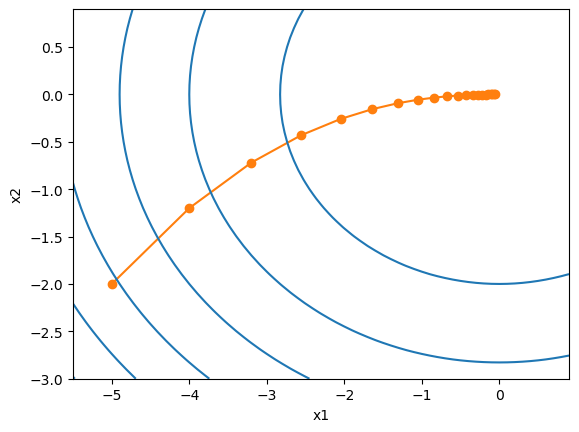

In [20]:
def f_2d(x1, x2):
    return x1 ** 2 + 2 * x2 ** 2

def f_2d_grad(x1, x2):
    return np.array([2 * x1, 4 * x2])

def gd_2d(x, grad):
    return x - eta * grad
    
eta = 0.1
show_trace_2d(f_2d, train_2d(gd_2d, f_grad=f_2d_grad))


## Stochastic Gradient Updates

In many cases, the objective function is usually the average of the loss functions for each example in the training dataset. Suppose we have a training dataset of $n$ examples, and $f_i(\mathbf{x})$ is the loss function with respect to the training example of index $i$. Then we arrive at the objective function

$$f(\mathbf{x}) = \frac{1}{n} \sum_{i = 1}^n f_i(\mathbf{x}).$$



The gradient of the objective function at $\mathbf{x}$ is computed as

$$\nabla f(\mathbf{x}) = \frac{1}{n} \sum_{i = 1}^n \nabla f_i(\mathbf{x}).$$



If gradient descent is used, the computational cost for each independent variable iteration is $\mathcal{O}(n)$, which grows linearly with $n$. Therefore, when the training dataset is larger, the cost of gradient descent for each iteration will be higher.



Stochastic gradient descent (SGD) reduces computational cost at each iteration. Instead of calculating all $n$ gradient, at each iteration of stochastic gradient descent, we uniformly sample an index $i\in\{1,\ldots, n\}$ for data examples at random, and compute the gradient $\nabla f_i(\mathbf{x})$ to update $\mathbf{x}$:

$$\mathbf{x} \leftarrow \mathbf{x} - \eta \nabla f_i(\mathbf{x}),$$



where $\eta$ is the learning rate. We can see that the computational cost for each iteration drops from $\mathcal{O}(n)$ of the gradient descent to the constant $\mathcal{O}(1)$. 



Notice that

$$\mathbb{E}_i \nabla f_i(\mathbf{x}) = \frac{1}{n} \sum_{i = 1}^n \nabla f_i(\mathbf{x}) = \nabla f(\mathbf{x}).$$

This means that, on average, the stochastic gradient $\nabla f_i(\mathbf{x})$ is a good estimate of the full gradient $\nabla f(\mathbf{x})$.



Now, we will compare it with gradient descent by adding random noise with a mean of 0 and a variance of 1 to the gradient to simulate a stochastic gradient descent.


epoch 50, x1: -0.23334871815686403, x2: -0.19771970876216194


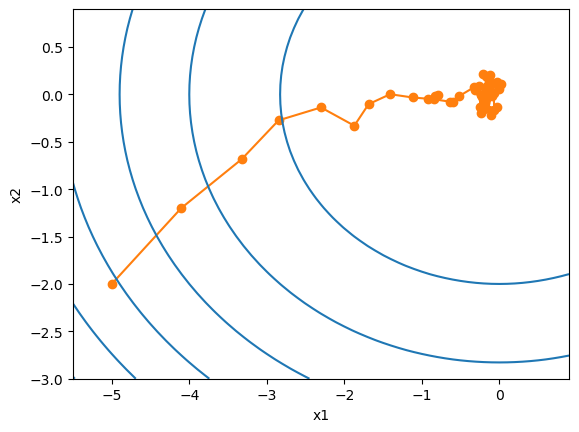

In [21]:
def sgd(x, grad):
    g1, g2 = grad
    # Simulate noisy gradient
    g1 += np.random.normal(0.0, 1)
    g2 += np.random.normal(0.0, 1)
    eta_t = eta * lr()
    return x - eta_t * np.array([g1, g2])

def constant_lr():
    return 1

eta = 0.1
lr = constant_lr  # Constant learning rate
results = train_2d(sgd, steps=50, f_grad=f_2d_grad)
show_trace_2d(f_2d, results)

## Stochastic Gradient Updates

As we can see, the trajectory of the variables in the stochastic gradient descent is much more noisy than the one we observed in gradient descent. This is due to the stochastic nature of the gradient. 



That is, even when we arrive near the minimum, we are still subject to the uncertainty injected by the instantaneous gradient via $\eta \nabla f_i(\mathbf{x})$. Even after 50 steps the quality is still not so good. Even worse, it will not improve after additional steps (we encourage you to experiment with a larger number of steps to confirm this). 



This leaves us with the only alternative: change the learning rate $\eta$. However, if we pick this too small, we will not make any meaningful progress initially. On the other hand, if we pick it too large, we will not get a good solution, as seen above. The only way to resolve these conflicting goals is to reduce the learning rate *dynamically* as optimization progresses.

### Local Minima

What about local minima? To illustrate what happens for nonconvex functions consider the (1D) case of $f(x) = x \cdot \cos(cx)$ for some constant $c$. 



This function has infinitely many local minima. Depending on our choice of the learning rate and depending on how well conditioned the problem is, we may end up with one of many solutions. 



The example below illustrates how an (unrealistically) high learning rate will lead to a poor local minimum.


epoch 10, x: -1.528166


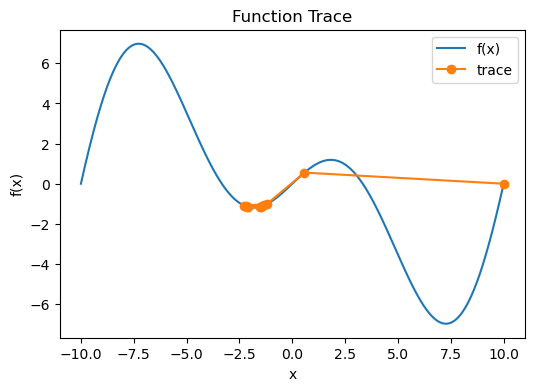

In [22]:
def f(x):  # Objective function
    c = 0.15 * np.pi
    if isinstance(x, list):
        return [xi * np.cos(c * xi) for xi in x]  # Apply the operation element-wise if x is a list
    else:
        return x * np.cos(c * x)  # Otherwise, if x is a single value, perform the operation directly

def f_grad(x):  # Gradient of the objective function
    c = 0.15 * np.pi
    return np.cos(c * x) - c * x * np .sin(c * x)

show_trace(gd(2, f_grad), f)

### Local Minima

The problem of local minima and stochastic updates both have the same solution: adapt the learning rate. There are many strategies to do this, e.g., by starting with a high learning rate and then decreasing it (learning rate schedule), or by using an even more sophisticated strategy.

There are two key advances in optimization that have been critical to the success of deep learning in recent years (IMHO):
 - Using adaptive learning rates that adjust the learning rate during training. This is analogous to simulated annealing in optimization and helps to avoid getting stuck in local minima.
 - Including a momentum term in the optimization algorithm. This momentum term helps us to navigate saddle points more effectively.

Examples of algorithms that use these advances include Adam, RMSprop, and Adagrad. Adam is one of the most popular optimization algorithms in deep learning and is widely used in practice. It was used in the example above, and if you rerun it using optimizer='sgp' you will see that the optimization is much slower.

Fun note, the Adam optimizer was first presented in an ICLR paper by Diederik Kingma and Jimmy Ba in 2015 in San Diego :-): https://arxiv.org/pdf/1412.6980.pdf

The name Adam is derived from adaptive moment estimation.

Interestingly, this problem should get worse in higher dimensions as there are more opportunities to get stuck in local minima. However, as we will see later, the high-dimensional problems that are typically of interest in deep learning are often easier to optimize than the lower-dimensional problems that are commonly encountered in practice.